<a href="https://colab.research.google.com/github/Estebanc0/ADA-Informes/blob/main/Informe_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripción del problema:


Entrada: un arreglo de n números desordenado siendo n el largo del arreglo

Salida: el mismo arreglo de tamaño n pero ordenado de menor a mayor


# Descripción del algoritmo


Radixsort es un algoritmo que clasifica los elementos agrupando primero los dígitos individuales del mismo valor posicional y luego ordena los elementos según su orden creciente/decreciente. Esto lo hace de siguiente forma:





1.   Recibe como entrada un array de n números.

2.   Encuentra el máximo elemento en el array.

3.   Utiliza a countingSort (o cualquier otra técnica de clasificación estable) para revisar cada lugar significativo. Ordenando primero los elementos según los dígitos en el lugar de las unidades.



1.   Luego ordena los elementos según los dígitos en el lugar de las decenas.

2.   Finalmente, ordena los elementos según los dígitos en el lugar de las centenas y retorna el array inicial pero ordenado.



In [ ]:
def countingSort(array, place,verbose=False):
    global pasada
    size = len(array)
    output = [0] * size
    count = [0] * 10
    pasada+=1
    if verbose==True and pasada==1: print("Ordenando las unidades\n")
    if verbose==True and pasada==2: print("Ordenando las decenas\n")
    if verbose==True and pasada==3: print("Ordenando las centenas\n")
    
    # Calculate count of elements
    for i in range(0, size):
        index = array[i] // place
        count[index % 10] += 1
    if verbose==True: print("Recuento de cada elemento:",count)
    # Calculate cumulative count
    for i in range(1, 10):
        count[i] += count[i - 1]
    
    # Place the elements in sorted order
    i = size - 1
    while i >= 0:
        index = array[i] // place
        output[count[index % 10] - 1] = array[i]
        count[index % 10] -= 1
        i -= 1
    if verbose==True: print("Cambia los elementos a su posicion en el arreglo de salida:",count)
    for i in range(0, size):
        array[i] = output[i]
    if verbose==True: print("Salida de countingSort:",array,"\n")    

In [ ]:
def radix_Sort(array,verbose=False):
    # Get maximum element
    max_element = max(array)

    # Apply counting sort to sort elements based on place value.
    place = 1
    while max_element // place > 0:
        if verbose==True: countingSort(array, place,verbose=True)
        else: countingSort(array, place)
        place *= 10
    return array


In [ ]:
arr = [5,20,5,13,6,8,34,1]
pasada=0
print("Arreglo que entra:",arr,"\n")
ans = radix_Sort(arr)
print("Arreglo ordenado ",ans)

Arreglo que entra: [5, 20, 5, 13, 6, 8, 34, 1] 

Arreglo ordenado  [1, 5, 5, 6, 8, 13, 20, 34]


# Ejemplo mediante la funcion verbose

In [ ]:
arr = [2000,345,13,6,8877,34,1]
pasada=0
print("Arreglo que entra:",arr,"\n")
ans = radix_Sort(arr,verbose=True)
print("Arreglo ordenado ",ans)

Arreglo que entra: [2000, 345, 13, 6, 8877, 34, 1] 

Ordenando las unidades

Recuento de cada elemento: [1, 1, 0, 1, 1, 1, 1, 1, 0, 0]
Cambia los elementos a su posicion en el arreglo de salida: [0, 1, 2, 2, 3, 4, 5, 6, 7, 7]
Salida de countingSort: [2000, 1, 13, 34, 345, 6, 8877] 

Ordenando las decenas

Recuento de cada elemento: [3, 1, 0, 1, 1, 0, 0, 1, 0, 0]
Cambia los elementos a su posicion en el arreglo de salida: [0, 3, 4, 4, 5, 6, 6, 6, 7, 7]
Salida de countingSort: [2000, 1, 6, 13, 34, 345, 8877] 

Ordenando las centenas

Recuento de cada elemento: [5, 0, 0, 1, 0, 0, 0, 0, 1, 0]
Cambia los elementos a su posicion en el arreglo de salida: [0, 5, 5, 5, 6, 6, 6, 6, 6, 7]
Salida de countingSort: [2000, 1, 6, 13, 34, 345, 8877] 

Recuento de cada elemento: [5, 0, 1, 0, 0, 0, 0, 0, 1, 0]
Cambia los elementos a su posicion en el arreglo de salida: [0, 5, 5, 6, 6, 6, 6, 6, 6, 7]
Salida de countingSort: [1, 6, 13, 34, 345, 2000, 8877] 

Arreglo ordenado  [1, 6, 13, 34, 345, 2000, 8877

# Correctitud



# Tiempo de ejecución
Como se está utilizando countinSort para la implementación RadixSort tendrá su misma complejidad temporal de O(n+k) tanto en su mejor caso, caso promedio y peor caso.

# Comparacion entre radixSort y Bucketsort

In [ ]:
def bucket_sort(alist):
    largest = max(alist)
    length = len(alist)
    size = largest/length
 
    buckets = [[] for _ in range(length)]
    for i in range(length):
        j = int(alist[i]/size)
        if j != length:
            buckets[j].append(alist[i])
        else:
            buckets[length - 1].append(alist[i])
 
    for i in range(length):
        insertion_sort(buckets[i])
 
    result = []
    for i in range(length):
        result = result + buckets[i]
 
    return result
 
def insertion_sort(alist):
    for i in range(1, len(alist)):
        temp = alist[i]
        j = i - 1
        while (j >= 0 and temp < alist[j]):
            alist[j + 1] = alist[j]
            j = j - 1
        alist[j + 1] = temp

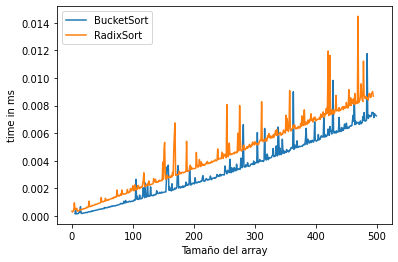

In [ ]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

x=[]; y=[]; z=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

 
  t = repeat(setup="from __main__ import bucket_sort", stmt=f"bucket_sort({a})", repeat=1, number=10)
  h = repeat(setup="from __main__ import radix_Sort", stmt=f"radix_Sort({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  z.append(h)

plt.plot(x,y,z)
plt.legend(["BucketSort","RadixSort"])
plt.xlabel('Tamaño del array')
plt.ylabel('time in ms')
plt.show()

# Análisis
Como se logra Apreciar en el gráfico Bucketsort posee un tiempo de ejecución menor que el de radixSort esto debido a que Bucketsort (con esta implementación) posee un tiempo de O(n) mientras radixSort (con esta implementación posee uno de O(n+k)